<a href="https://colab.research.google.com/github/LobaXgreecy/github-slideshow/blob/greeshmakh2601-patch-1/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A MACHINE LEARNING MODEL TO PREDICT DIABETES IN PATIENTS**

DATASET USED : Pima Indians Diabetes Dataset

METHODOLGY : Random Forest Classifier

Steps involved:
1. Loading Libraries
2. Loading Dataset
3. Data visualization
4. Data Preprocessing
5. Model Implementation
6. Model Optimization







1. Loading Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report      
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import *
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import plotly.offline as py
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint as sp_randint
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

2. Loading dataset

In [4]:
data = pd.read_csv('/content/diabetes.csv')


In [5]:
data.shape


(768, 9)

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.duplicated().sum()

0

3. Data Visualization

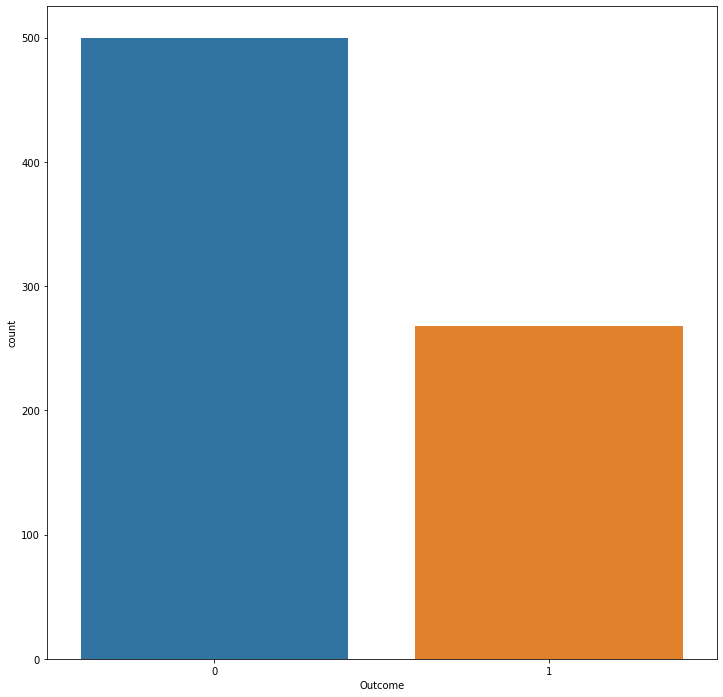

In [10]:
plt.figure(figsize =(12,12))
sns.countplot(x = 'Outcome' ,data=data)
plt.show()

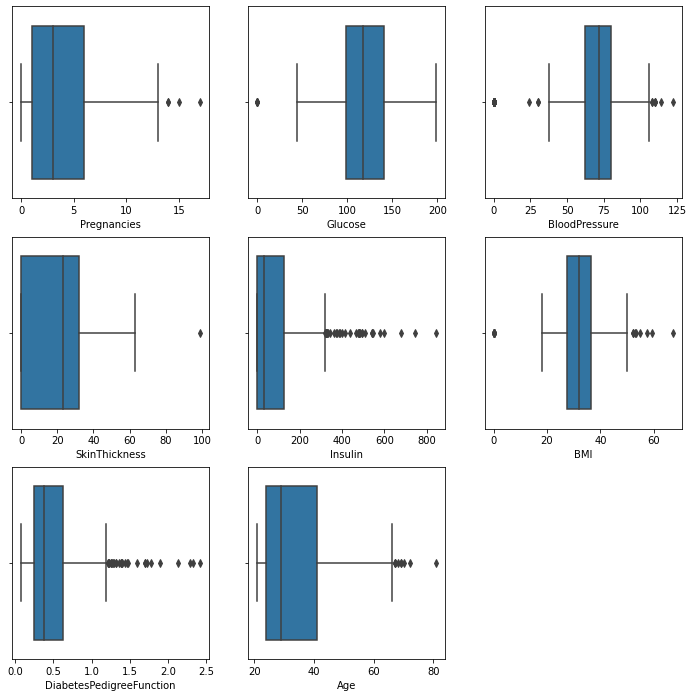

In [11]:
plt.figure(figsize = (12,12))
for i, col in enumerate(['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']):
  plt.subplot(3,3,i+1)
  sns.boxplot(x =col , data=data)
plt.show()

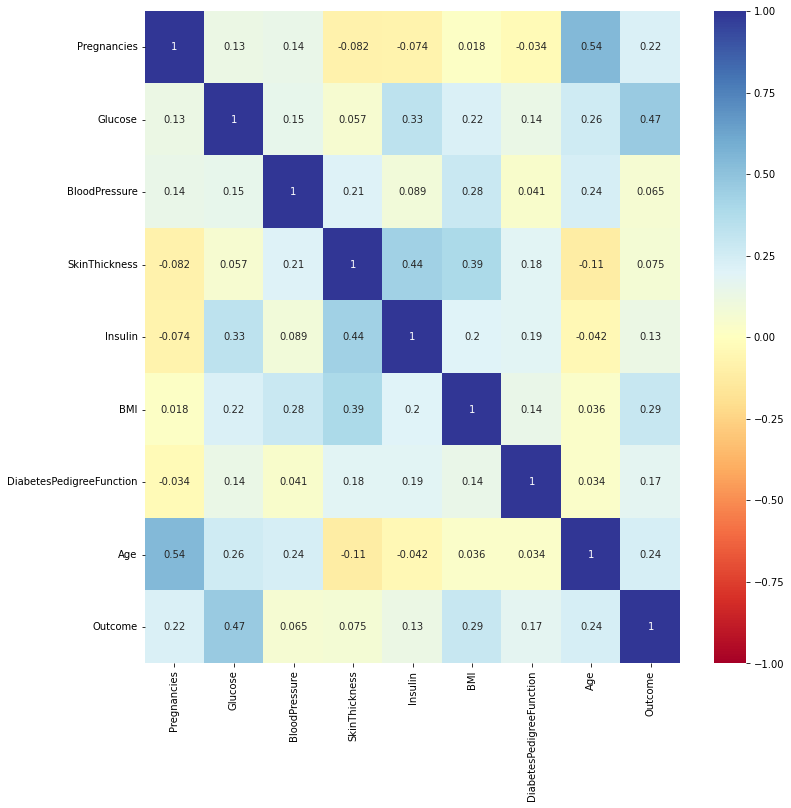

In [12]:
plt.figure(figsize =(12,12))
sns.heatmap(data.corr(),vmin=-1.0,center=0,cmap='RdYlBu',annot= True,data=data)
plt.show()

In [13]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
data.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


4. Data Preprocessing

In [15]:
data_copy = data.copy(deep= True)
data_copy[['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI']] = data_copy[['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI']].replace(0,np.NaN)
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [16]:
data_copy[data_copy.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


There are 3 approaches to tackling missing values
1.Drop column
2.Imputation
3.Extended imputation:-Where the imputation made is reflected in the dataset


Here we use KNN method to fill the missing values

In [17]:
imputer  = KNNImputer(n_neighbors=2)
imputer.fit(data_copy)
data_copy[ : ] = imputer.transform(data_copy)

In [18]:
X = data.drop(['Outcome'] , axis=1)
y = data['Outcome']

In [19]:
normalize = preprocessing.StandardScaler()
norm_df = normalize.fit_transform(X)
X = pd.DataFrame(norm_df , index=X.index , columns = X.columns)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


5. Model Implementation

In [20]:
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size= 0.2 , random_state= 42)

In [21]:
rfc = RandomForestClassifier()
rf_model = rfc.fit(X_train , y_train)

In [22]:
predictions = rf_model.predict(X_test)
accuracy_score(y_test , predictions)

0.7402597402597403

In [34]:
confusion_matrix(y_test ,predictions)

array([[79, 20],
       [20, 35]])

In [36]:
print(classification_report(y_test ,predictions))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



6. Model Optimization

In [23]:
n_estimators = [100,200,300,400,500,600,800,1000]
max_features = ['sqrt' , 'log2', None]
max_depth = [2,3,4,5,6,7,8,9,10]
min_samples_split = sp_randint(2, 50)
bootstrap = [True ,False ]

In [24]:
param_test = {'bootstrap' : bootstrap ,
              'criterion' : ['gini' , 'entropy' , 'log_loss'],
              'n_estimators' : n_estimators, 
              'max_features' : max_features,
              'max_depth': max_depth,
              'min_samples_split' : min_samples_split}
print(param_test)

{'bootstrap': [True, False], 'criterion': ['gini', 'entropy', 'log_loss'], 'n_estimators': [100, 200, 300, 400, 500, 600, 800, 1000], 'max_features': ['sqrt', 'log2', None], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fec4a289550>}


In [25]:
rfc = RandomForestClassifier(random_state= 42 ,n_jobs =1 )
grid_search = RandomizedSearchCV(
    estimator=rfc ,
    param_distributions = param_test ,
    n_iter =300,
    scoring ='roc_auc',
    cv = 5, 
    refit = True,
    random_state =42,
    verbose =True)
grid_search.fit(X_train ,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=1, random_state=42),
                   n_iter=300,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fec4a289550>,
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 800, 1000]},
                   random_state=42, scoring='roc_auc', verbose=True)

In [26]:
opt_params = grid_search.best_params_
opt_params

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_split': 45,
 'n_estimators': 500}

In [27]:
rfecv = RFECV(estimator = (GradientBoostingClassifier()))
rf_opt = RandomForestClassifier(**opt_params)
pipeline = Pipeline([('Feature Selection' , rfecv) , ('Model' , rf_opt)])
cv = RepeatedStratifiedKFold(n_splits =10 , n_repeats =10 ,random_state =42)
n_scores = cross_val_score(pipeline , X_train , y_train ,scoring = 'roc_auc' ,cv=5 ,n_jobs=1)
print(np.mean(n_scores))
pipeline.fit(X_train ,y_train)
print("optimal number of features : %d" % rfecv.n_features_)


0.8463278440862421
optimal number of features : 4


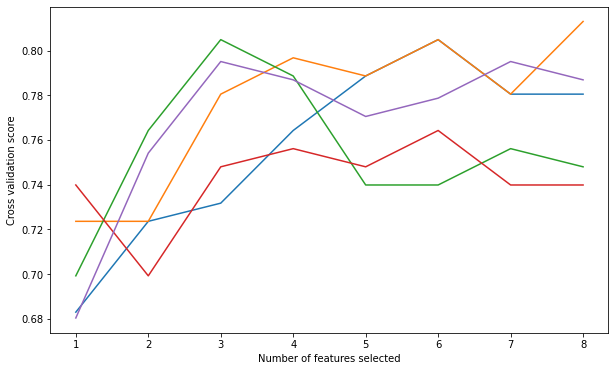

In [28]:
%matplotlib inline
plt.figure(figsize =(10 ,6 ))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

In [29]:
pred =pipeline.predict(X_test)
accuracy_score(y_test ,pred)

0.7597402597402597

In [30]:
confusion_matrix(y_test ,pred)

array([[82, 17],
       [20, 35]])

In [32]:
print(classification_report(y_test ,pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154

